In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import matplotlib.pylab as pylab
import cartopy.feature as cfeature
import xarray as xr
import pdb
from utils import constants as cnst
from wavelet import util, wav1d

pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [35]:
data = xr.open_dataarray('/home/ck/DIR/cornkle/data/VERA/lsta_trend_chris/2021_mean_lst_trend_dsett10.nc').sel(lat=slice(6,10), lon=slice(-10,-6))  #mean_lst_trend_1991_2019_dsett10.nc')

In [36]:
data.values[data.values<=-998]=0.01

In [37]:
data.lat.values[1::]-data.lat.values[0:-1]

array([0.05015674, 0.05015674, 0.05015674, 0.05015674, 0.05015674,
       0.05015674, 0.05015674, 0.05015674, 0.05015674, 0.05015674,
       0.05015674, 0.05015674, 0.05015674, 0.05015674, 0.05015674,
       0.05015674, 0.05015674, 0.05015674, 0.05015674, 0.05015674,
       0.05015674, 0.05015674, 0.05015674, 0.05015674, 0.05015674,
       0.05015674, 0.05015674, 0.05015674, 0.05015674, 0.05015674,
       0.05015674, 0.05015674, 0.05015674, 0.05015674, 0.05015674,
       0.05015674, 0.05015674, 0.05015674, 0.05015674, 0.05015674,
       0.05015674, 0.05015674, 0.05015674, 0.05015674, 0.05015674,
       0.05015674, 0.05015674, 0.05015674, 0.05015674, 0.05015674,
       0.05015674, 0.05015674, 0.05015674, 0.05015674, 0.05015674,
       0.05015674, 0.05015674, 0.05015674, 0.05015674, 0.05015674,
       0.05015674, 0.05015674, 0.05015674, 0.05015674, 0.05015674,
       0.05015674, 0.05015674, 0.05015674, 0.05015674, 0.05015674,
       0.05015674, 0.05015674, 0.05015674, 0.05015674, 0.05015

In [38]:
data.lon.values[1::]-data.lon.values[0:-1]

array([0.05006588, 0.05006588, 0.05006588, 0.05006588, 0.05006588,
       0.05006588, 0.05006588, 0.05006588, 0.05006588, 0.05006588,
       0.05006588, 0.05006588, 0.05006588, 0.05006588, 0.05006588,
       0.05006588, 0.05006588, 0.05006588, 0.05006588, 0.05006588,
       0.05006588, 0.05006588, 0.05006588, 0.05006588, 0.05006588,
       0.05006588, 0.05006588, 0.05006588, 0.05006588, 0.05006588,
       0.05006588, 0.05006588, 0.05006588, 0.05006588, 0.05006588,
       0.05006588, 0.05006588, 0.05006588, 0.05006588, 0.05006588,
       0.05006588, 0.05006588, 0.05006588, 0.05006588, 0.05006588,
       0.05006588, 0.05006588, 0.05006588, 0.05006588, 0.05006588,
       0.05006588, 0.05006588, 0.05006588, 0.05006588, 0.05006588,
       0.05006588, 0.05006588, 0.05006588, 0.05006588, 0.05006588,
       0.05006588, 0.05006588, 0.05006588, 0.05006588, 0.05006588,
       0.05006588, 0.05006588, 0.05006588, 0.05006588, 0.05006588,
       0.05006588, 0.05006588, 0.05006588, 0.05006588, 0.05006

Text(0.5, 1.0, 'Land surface temperature trends (K/decade)')

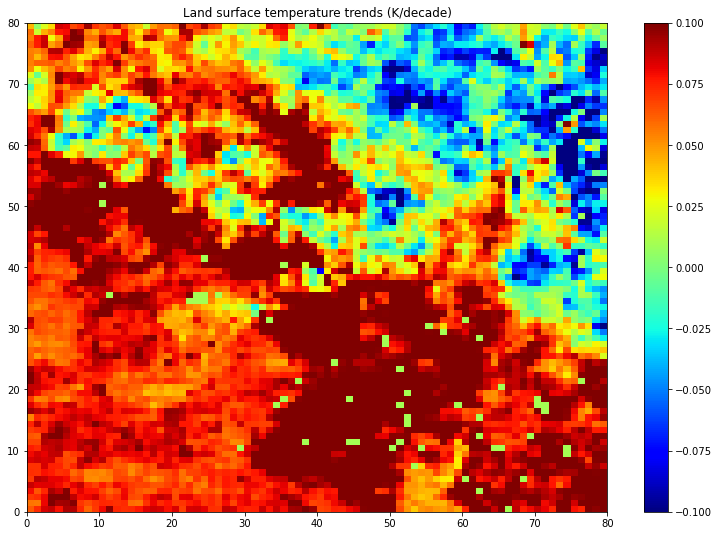

In [39]:
plt.figure(figsize=(13,9))
plt.pcolormesh(data, vmin=-0.1, vmax=0.1, cmap='jet')
plt.colorbar()
plt.title('Land surface temperature trends (K/decade)')

In [40]:
# prepare wavelet decomposition
wdic = {}
wdic['dx'] = 5 # approx resolution of data in km or deg (scale output will then correspond to either km or deg)
wdic['dist'] = 0.4 # distance between scales
wdic['start'] = 16 # start scale
wdic['nb'] = 10 # number of scales



In [41]:
# define 

def waveletT1D(t, dx=wdic['dx'], dist=wdic['dist'],start=wdic['start'], nb=wdic['nb'], sign='positive'):

    #1D continuous wavelet analysis:

    tir=t.copy()
    if sign!='positive':   # defines whether positive or negative anomaly features should be considered for scale decomposition
        tir = tir*-1
    tir[tir<0] = 0
    tir = (tir - np.mean(tir)) / np.std(tir)

    obj = wav1d.wavelet(dx, dist, nb, start=start)

    #TIR
    coeffsTIRx, powerTIRx = obj.calc_coeffs(tir, le_thresh=0, fill=0.0001, direction='x')
    coeffsTIRy, powerTIRy = obj.calc_coeffs(tir, le_thresh=0, fill=0.0001, direction='y')


    tir_shuff = tir.copy()
    np.random.shuffle(tir_shuff)

    coeffsSIGx, powerSIGx = obj.calc_coeffs(tir_shuff, le_thresh=0, fill=0.0001, direction='x')
    coeffsSIGy, powerSIGy = obj.calc_coeffs(tir_shuff, le_thresh=0, fill=0.0001, direction='y')

    sigx = obj.significance(powerTIRx, powerSIGx, direction='x', mask=None)
    sigy = obj.significance(powerTIRy, powerSIGy, direction='y', mask=None)

    dic = {}
    dic['powerx']=powerTIRx
    dic['powery'] = powerTIRy
    dic['scales'] = obj.scales
    dic['res'] = obj.res
    dic['coeffsx'] = coeffsTIRx
    dic['coeffsy'] = coeffsTIRy
    dic['sigx'] = sigx
    dic['sigy'] = sigy

    return dic

In [42]:
dic = waveletT1D(data.values)

(0.0, 0.32)

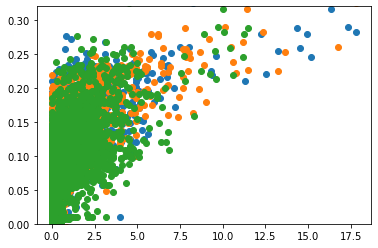

In [43]:
plt.scatter(dic['powerx'][5,:,:], data)
plt.scatter(dic['powerx'][2,:,:], data)
plt.scatter(dic['powerx'][7,:,:], data)
plt.ylim(0,0.32)

In [53]:
#Decomposited scales:
dic['scales']

array([ 16.        ,  21.11212657,  27.85761803,  36.75834736,
        48.50293013,  64.        ,  84.44850629, 111.4304721 ,
       147.03338944, 194.01172051, 256.        ])

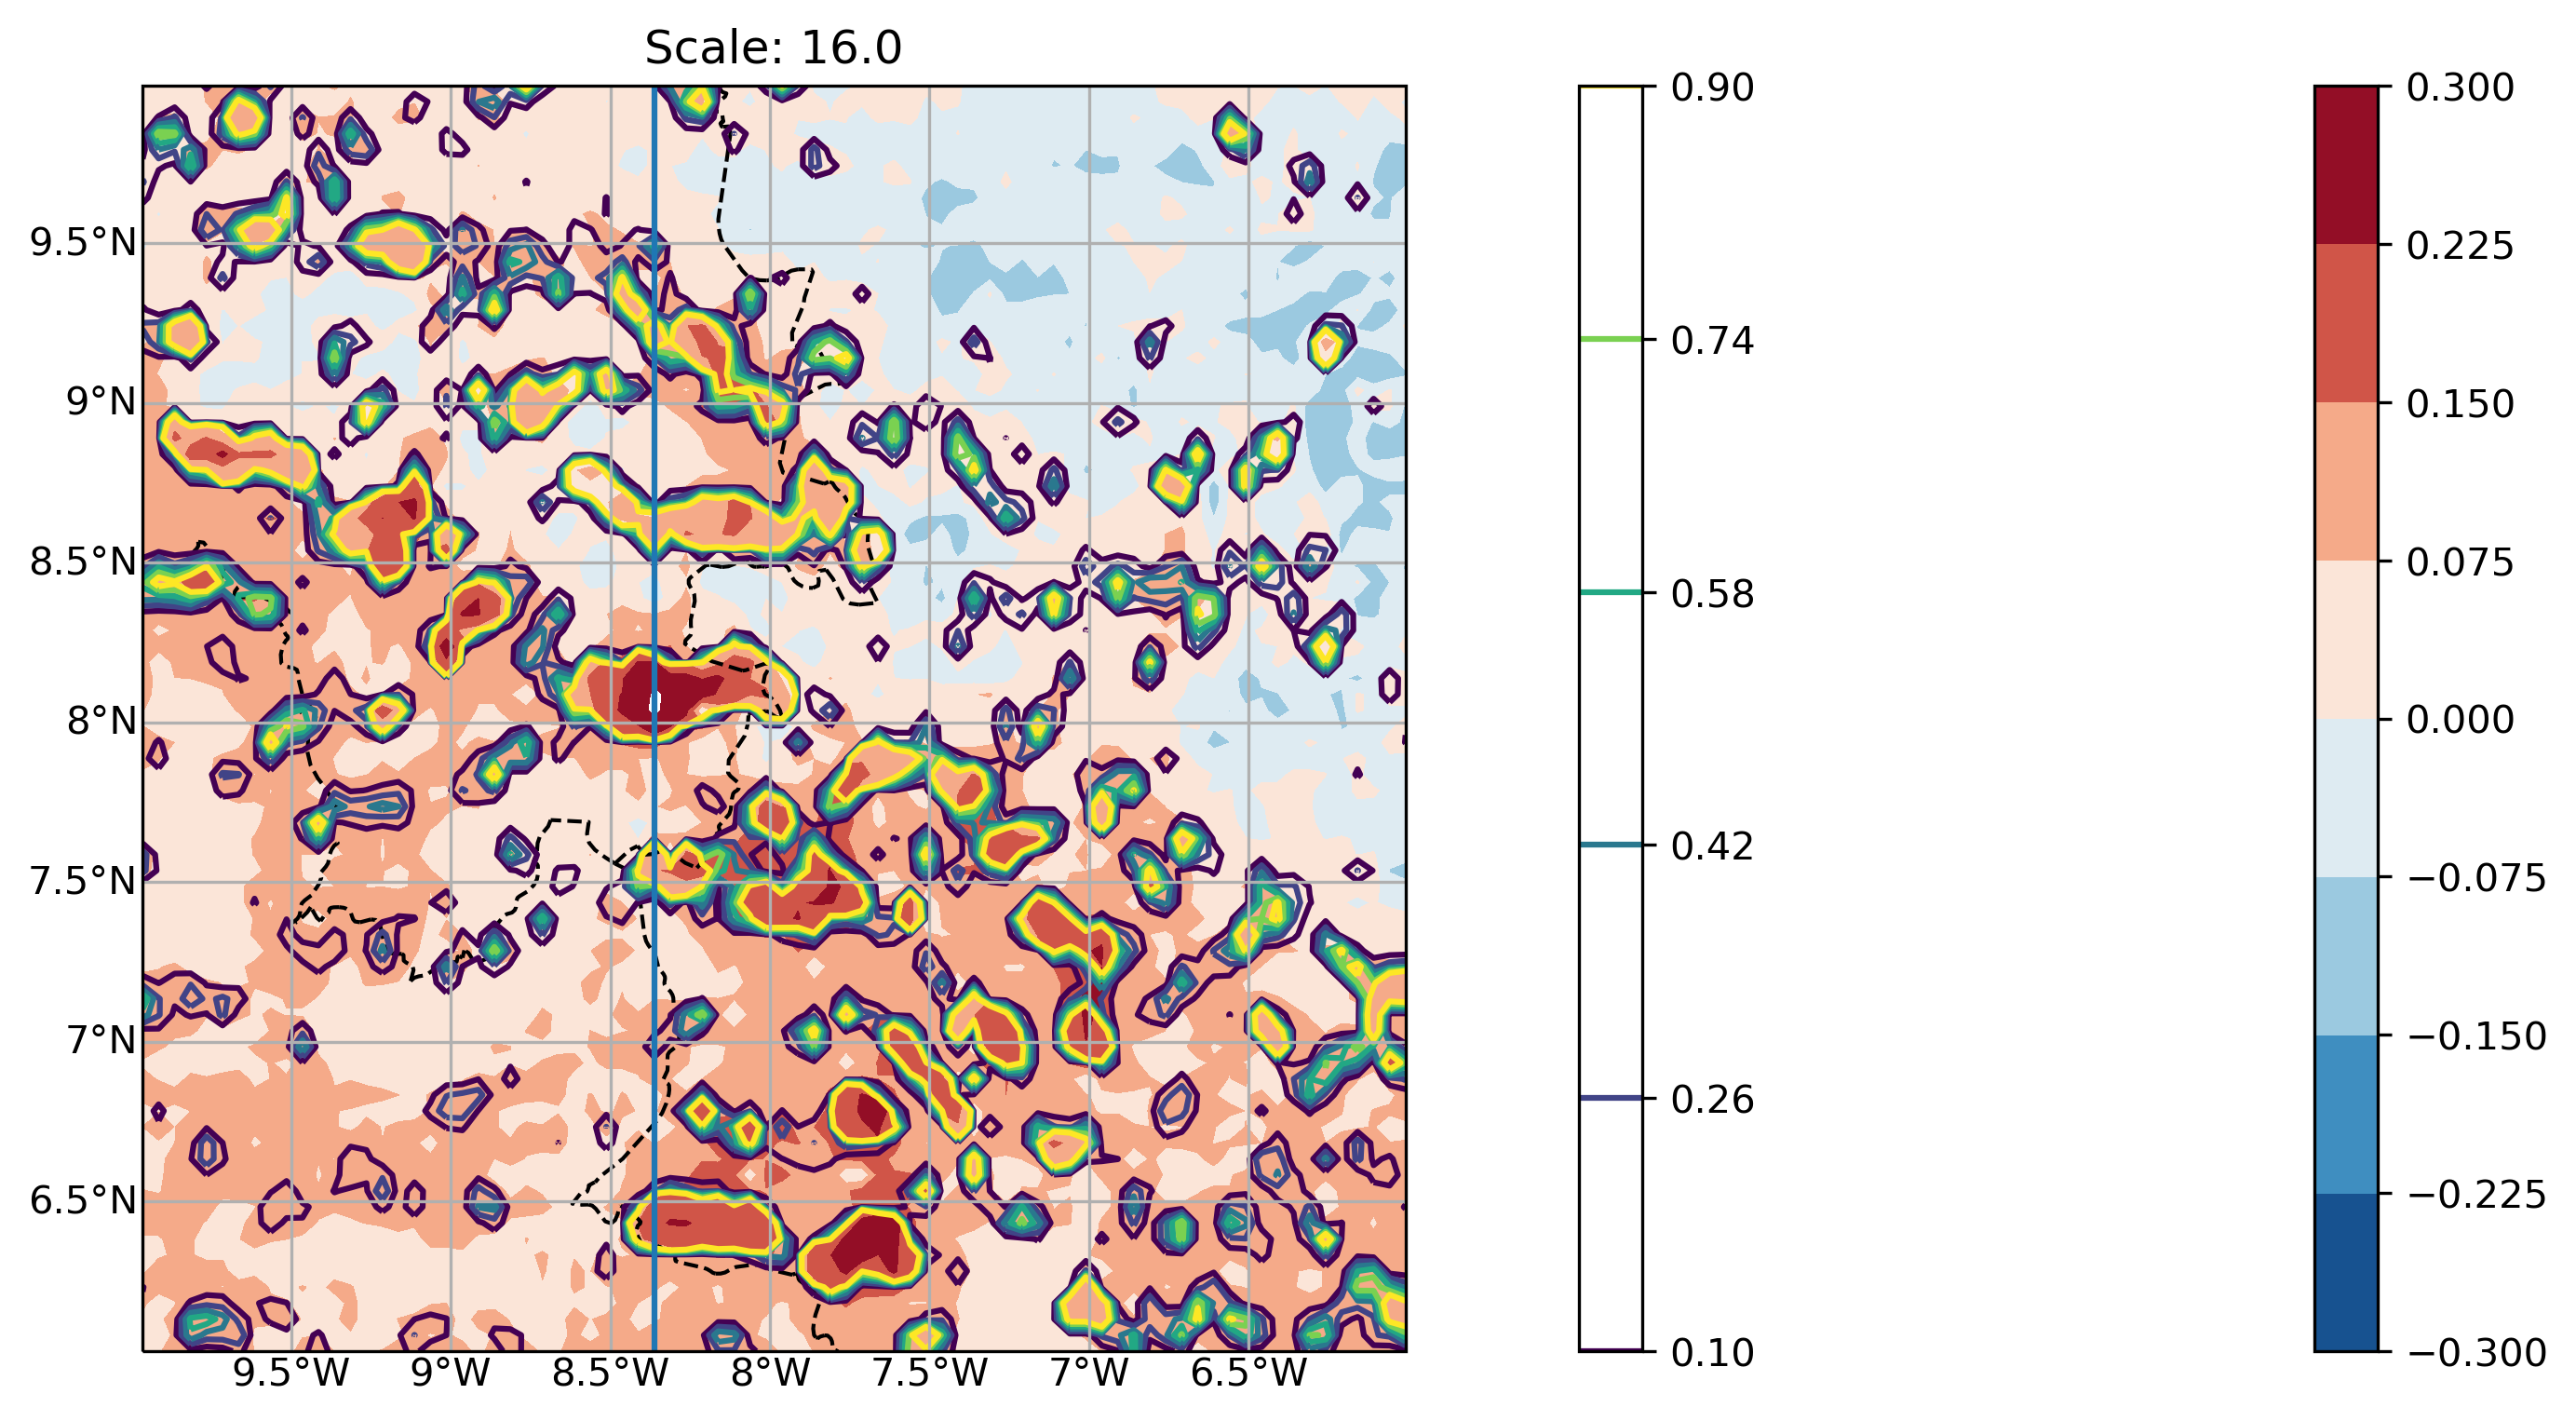

In [92]:
scale_ind=0
f = plt.figure(figsize=(20,6), dpi=300)
#plt.autoscale(False)
ax = f.add_subplot(111, projection=ccrs.PlateCarree()) # this opens a new plot axis
mapp = ax.contourf(data.lon, data.lat,data.values,levels=np.linspace(-0.3,0.3,9), cmap='RdBu_r', transform=ccrs.PlateCarree())  # this is the actual plot


maps = ax.contour(data.lon, data.lat,dic['powery'][scale_ind,:,:], levels=np.linspace(0.1,0.9,6))

ax.coastlines()  
# Gridlines
xl = ax.gridlines(draw_labels=True);   # adds latlon grid lines
xl.xlabels_top = False   ## labels off
xl.ylabels_right = False
#plt.title(title)
# Countries
ax.add_feature(cartopy.feature.BORDERS, linestyle='--'); # adds country borders
cbar = plt.colorbar(mapp)  # adds colorbar
cbar = plt.colorbar(maps)  # adds colorbar
plt.title('Scale: '+str(dic['scales'][scale_ind]))
ax.axvline(-8.36235178)



In [112]:
max_val = np.max(dic['powery'][0:-2,:,32], axis=0) > 0.5

In [113]:
maxs = np.argmax(dic['powery'][0:-2,:,32], axis=0)

Text(0.5, 0, 'Latitudes')

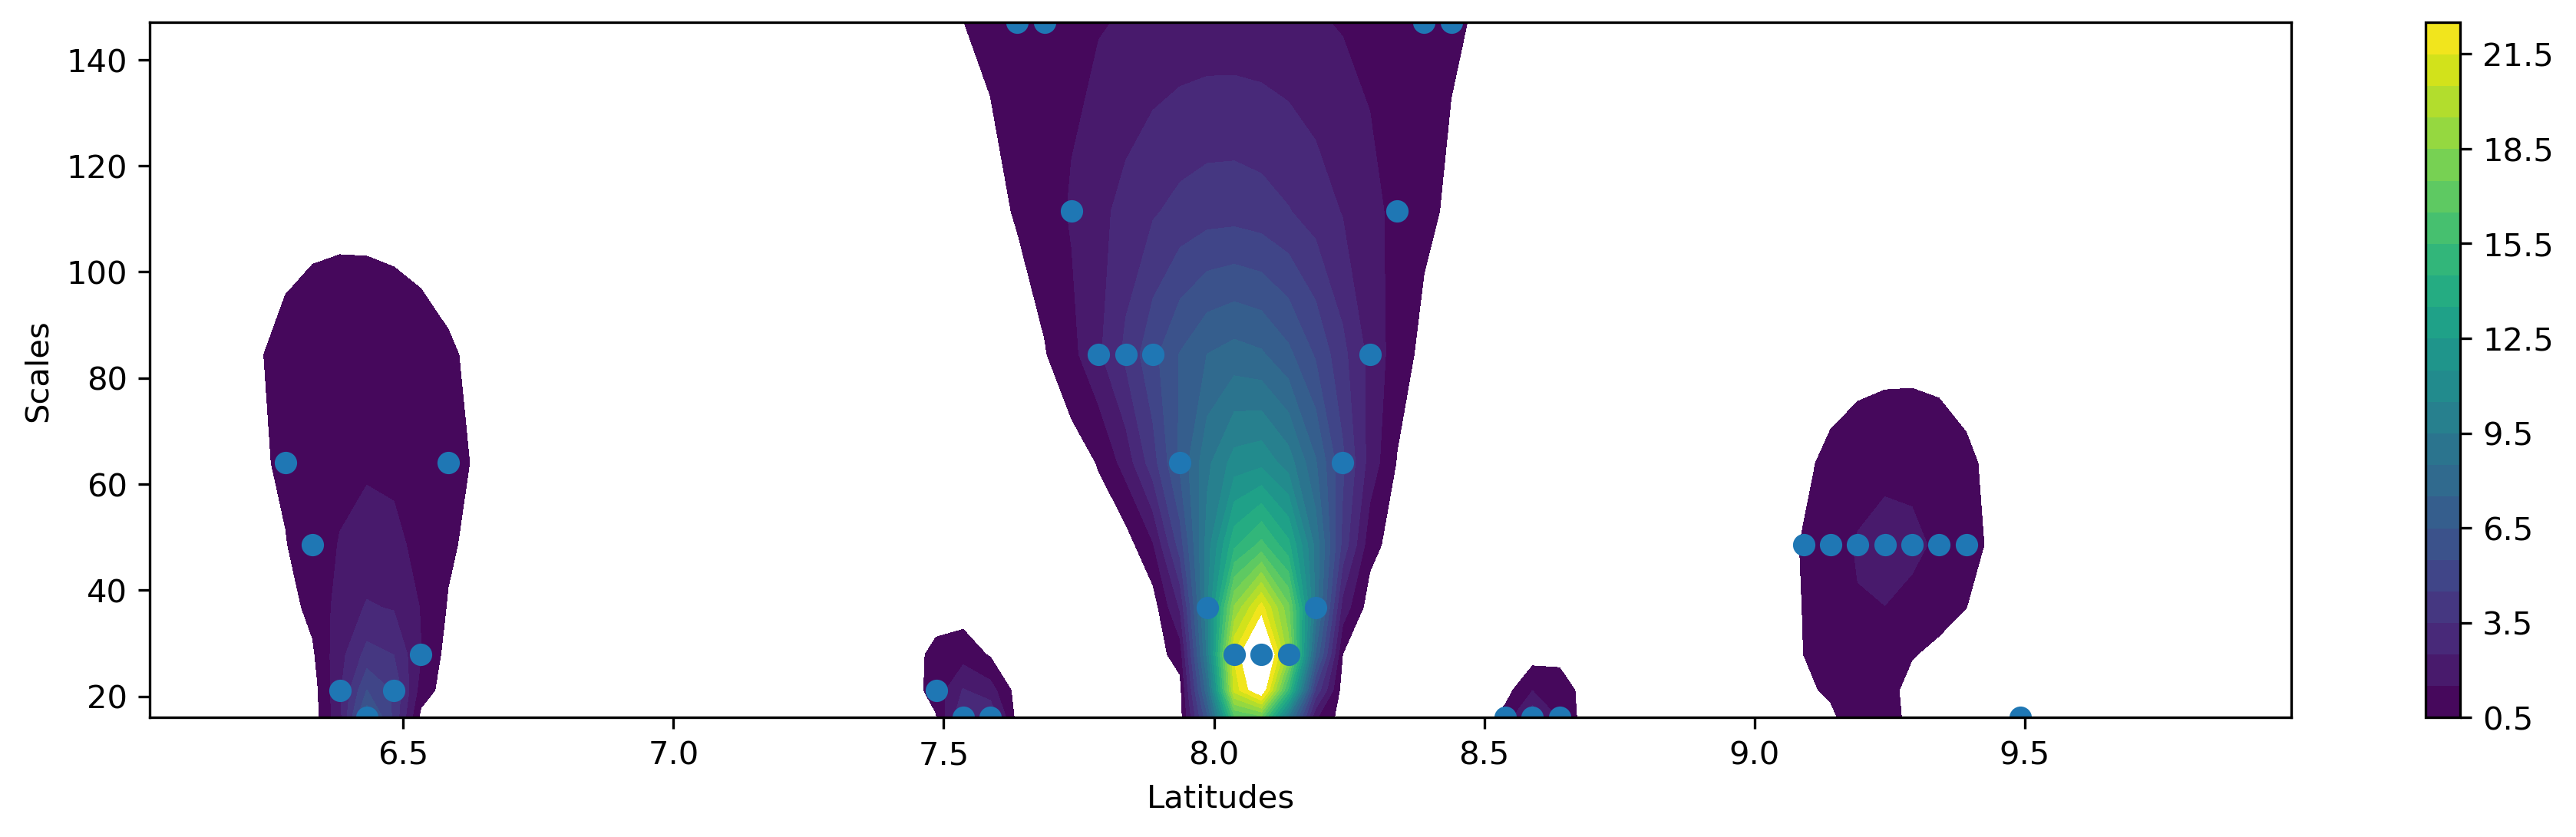

In [114]:
f = plt.figure(figsize=(15,4), dpi=300)
ax = f.add_subplot(111)
#ax.set_yscale('log')
mapp = ax.contourf(data.lat, dic['scales'][0:-2],  dic['powery'][0:-2,:,32],levels=np.arange(0.5,23))
plt.scatter(data.lat[max_val], ((dic['scales'][0:-2])[maxs])[max_val])

plt.colorbar(mapp)
ax.set_ylabel('Scales')
ax.set_xlabel('Latitudes')
plt.title('Powers per scale in y direction, dots indicate maximum power per pixel')